# Gráficos en Python 1:
## Barras, Barras apiladas, Puntos y Líneas

## Grafico de Barras

## Importar librerías requeridas

En la siguiente casilla importaremos los módulos necesarias para crear las visualizaciones.

In [2]:
# Importar el módulo pyplot de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt

# Importar la librería pandas y abreviarlo a pd
import pandas as pd
import seaborn as sns
import numpy as np

## Cargar dataset

El dataset que cargaremos consiste en un dataset de propinas (tips en inglés)

In [3]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("tips.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Ver las ultimas 5 líneas del archivo
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Generar visualización de gráfico de barras

In [6]:
# El gráfico nos mostrará la propina promedio que se entrega en
# diferentes días de la semana

# Primero generemos los datos en el formato para graficarlos
# Por cada día de la semana calcularemos el tip promedio
tip_por_dia = df.groupby('day')['tip'].mean()

print(tip_por_dia)

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


Text(0, 0.5, 'Propina promedio')

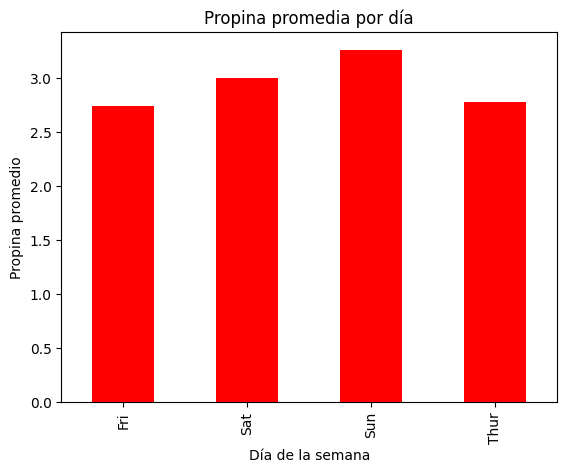

In [7]:
# graficamos ahora el arreglo resultante
ax = tip_por_dia.plot.bar(color = 'red', title = 'Propina promedia por día')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Propina promedio")

## Generar visualización de gráfico de barras apiladas

In [8]:
# Para este gráfico necesitamos 2 categorías

# Primero generemos los datos en el formato para graficarlos
# Por cada día de la semana calcularemos la cantidad de mesas ocupadas
# pero además separando por el sexo de la persona que hizo la reserva
MH_por_dia = df.groupby(['day','sex'])['tip'].count()

print(MH_por_dia)

day   sex   
Fri   Female     9
      Male      10
Sat   Female    28
      Male      59
Sun   Female    18
      Male      58
Thur  Female    32
      Male      30
Name: tip, dtype: int64


Text(0, 0.5, 'Cantidad de mesas')

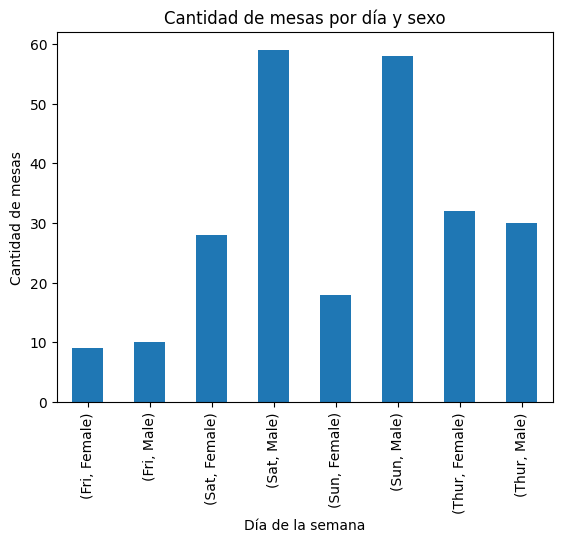

In [9]:
ax = MH_por_dia.plot.bar(stacked=True, title = 'Cantidad de mesas por día y sexo')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Cantidad de mesas")

In [10]:
# El gráfico anterior no es exactamente lo que esperábamos, no se ve la agrupación

# Debemos pasar el dataset a formato "ANCHO" (wide)
# para que los valores de la variable "sex" pasen a ser columnas

wide_MH_por_dia = MH_por_dia.unstack(level=-1)
print( wide_MH_por_dia )

sex   Female  Male
day               
Fri        9    10
Sat       28    59
Sun       18    58
Thur      32    30


Text(0, 0.5, 'Cantidad de clientes')

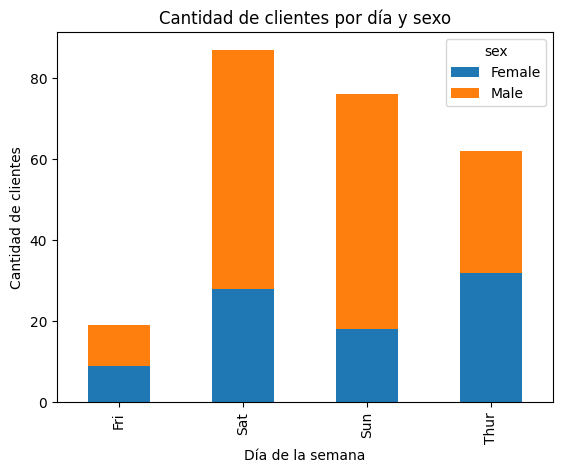

In [11]:
# Ahora tenemos el formato correcto. Intentemos de nuevo
ax = wide_MH_por_dia.plot.bar(stacked=True, title = 'Cantidad de clientes por día y sexo')
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Cantidad de clientes")

# Gráfico de Puntos

Para la segunda parte cargaremos un dataset de opservaciones de resonacias magnetica, hecha a diferentes pacientes.

In [12]:
fmri = sns.load_dataset("fmri")

## Veamos cuantas observaciones hay en el dataset
len(fmri)

1064

In [13]:
# Revisemos las 5 primeras filas
fmri.head(5)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [14]:
# Para poder graficar una sola serie de puntos 
#  (una observacion en cada momento en el tiempo) vamos a elegir:
# un paciente: s13
# un evento observado: cue (podría ser 'stim')
# una region del cerebro observada:  frontal  (podría ser 'parietal')

subject13 = fmri.loc[ (fmri.subject == 's13') & (fmri.event == 'cue') & (fmri.region == 'frontal') ]
print(subject13)

     subject  timepoint event   region    signal
605      s13          5   cue  frontal  0.056731
625      s13          0   cue  frontal -0.012576
637      s13          4   cue  frontal  0.058704
651      s13          3   cue  frontal  0.034135
659      s13          6   cue  frontal  0.022420
680      s13         17   cue  frontal -0.004190
708      s13         18   cue  frontal -0.012163
730      s13         14   cue  frontal -0.005701
770      s13         15   cue  frontal -0.003053
784      s13         16   cue  frontal -0.002522
938      s13         11   cue  frontal -0.040369
952      s13         10   cue  frontal -0.066287
960      s13         13   cue  frontal -0.009388
981      s13          2   cue  frontal  0.004396
995      s13          1   cue  frontal -0.010346
1016     s13          9   cue  frontal -0.082955
1029     s13          8   cue  frontal -0.070991
1040     s13         12   cue  frontal -0.020686
1060     s13          7   cue  frontal -0.029130


In [15]:
# Antes de graficar ordenaremos las filas en base a la columna timepoint
subject13 = subject13.sort_values(by='timepoint')
print(subject13)

     subject  timepoint event   region    signal
625      s13          0   cue  frontal -0.012576
995      s13          1   cue  frontal -0.010346
981      s13          2   cue  frontal  0.004396
651      s13          3   cue  frontal  0.034135
637      s13          4   cue  frontal  0.058704
605      s13          5   cue  frontal  0.056731
659      s13          6   cue  frontal  0.022420
1060     s13          7   cue  frontal -0.029130
1029     s13          8   cue  frontal -0.070991
1016     s13          9   cue  frontal -0.082955
952      s13         10   cue  frontal -0.066287
938      s13         11   cue  frontal -0.040369
1040     s13         12   cue  frontal -0.020686
960      s13         13   cue  frontal -0.009388
730      s13         14   cue  frontal -0.005701
770      s13         15   cue  frontal -0.003053
784      s13         16   cue  frontal -0.002522
680      s13         17   cue  frontal -0.004190
708      s13         18   cue  frontal -0.012163


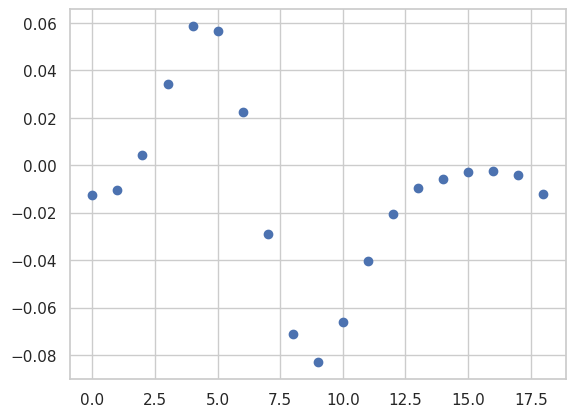

In [16]:
# Grafiquemos la señal en 19 puntos en el tiempo del usuario s13
sns.set()
sns.set_style("whitegrid")

plt.plot(subject13.timepoint, subject13.signal, marker = 'o', linestyle='')


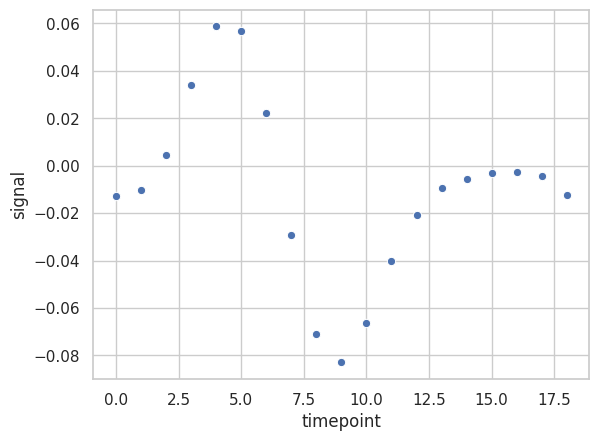

In [17]:
# Grafiquemos los datos del subject 13 con seaborn
ax = sns.lineplot(x="timepoint", y="signal", data=subject13, linewidth=0, marker = 'o')

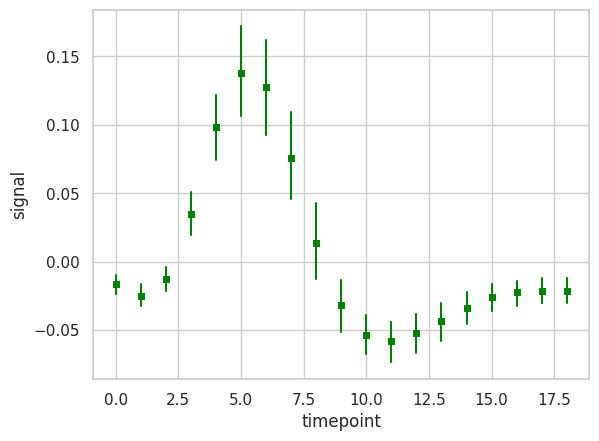

In [18]:
# Usemos ahora todos los datos asociados a un mismo timepoint ( no sólo subject 13)
# El marker ahora es un promedio de las señales en un mismo timepoint: 
# podemos tener barras de desviación estándar asociados
# Esto es muy fácil de hacer con seaborn

# Notar que para el lineplot de seaborn no tenemos que ordenar los datos previamente

ax = sns.lineplot(x="timepoint", y="signal", color="green", 
                  data=fmri, linewidth=0, marker = 's', err_style="bars")

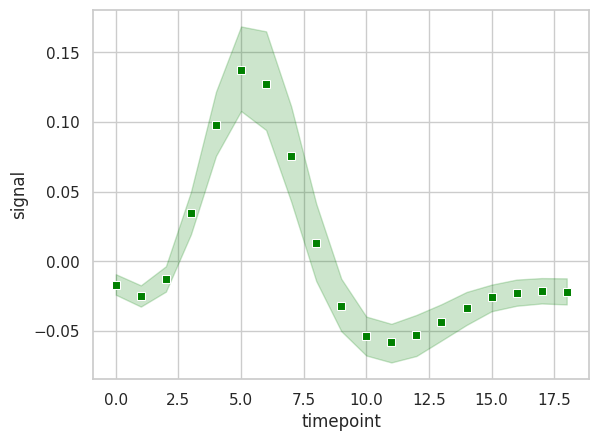

In [19]:
# Y con banda de error en lugar de barras de error

ax = sns.lineplot(x="timepoint", y="signal", color="green"
                  ,data=fmri, linewidth=0, marker = 's', err_style="band")

### Grafico de lineas

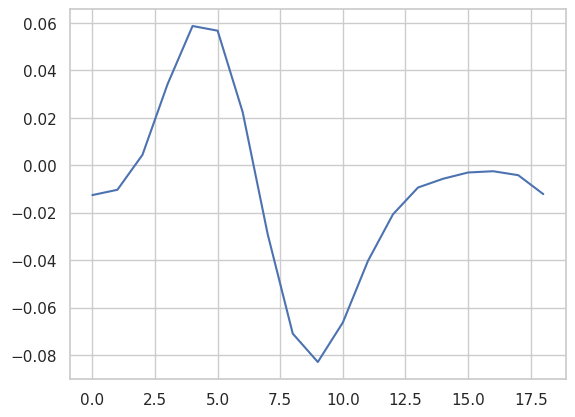

In [20]:
plt.plot(subject13.timepoint, subject13.signal)

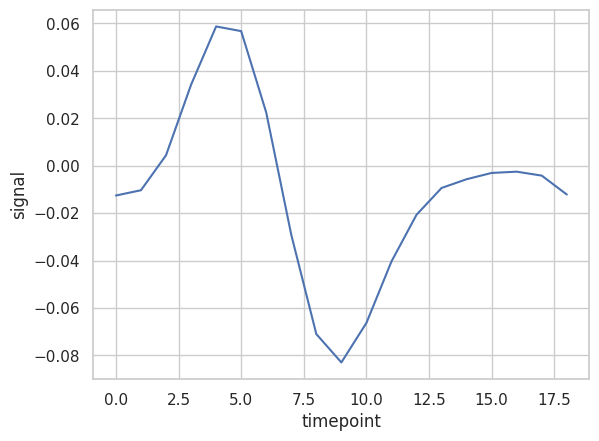

In [21]:
# versión por defecto en seaborn

ax = sns.lineplot(x="timepoint", y="signal",data=subject13)

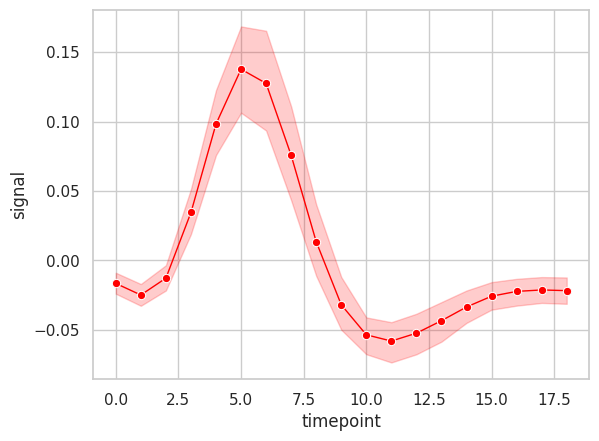

In [22]:
# Con varios puntos en el mismo timepoint (todos los subjects) 
# podemos agregar bandas de error

#change background style
sns.set_style("whitegrid")

ax = sns.lineplot(x="timepoint", y="signal", color="red", 
                  data=fmri, linewidth=1, marker = 'o', err_style="band")